## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_df.tail(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# We have 249 Mice 
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.  We have 249 Mice 
clean_df['Mouse ID'].count()

249

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# clean_df.describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# sem

In [8]:

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_df = combined_df.groupby("Drug Regimen")
summary_df2 = agg_df.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

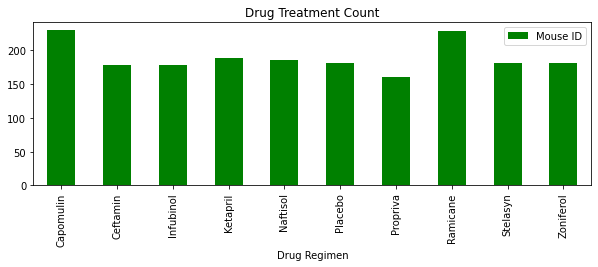

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
#reducing  the dataframe down to two columns
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar", figsize=(10,3) , color = "green")

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Count')

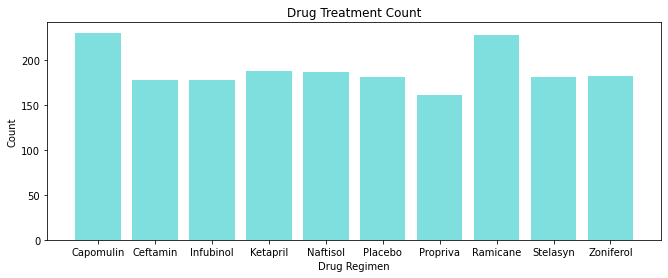

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list

#Turn drug_count into a list
drug_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

#Assign x-axis
x_axis = drug_list
#Creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='c', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")


Text(0, 0.5, '')

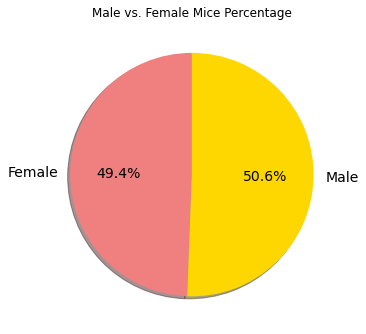

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=90, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14, colors = ["lightcoral" , "gold"]  )

plt.title("Male vs. Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")


(-1.2340611664243568,
 1.1153117096818577,
 -1.144274590623733,
 1.110373900276269)

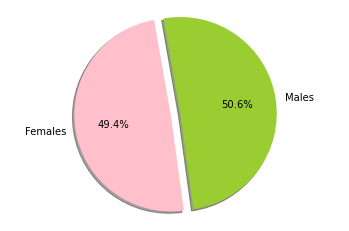

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Females", "Males"]
colors = ["pink", "yellowgreen"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_df.head()

# Start by getting the last (greatest) timepoint for each mouse

sorted_df = combined_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Capomulin

capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
# capo_obj

# Ramicane

ram_df = last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index()

ram_obj = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj = ram_obj["Tumor Volume (mm3)"]
# ram_obj

# Infubinol

infu_df = last_df[last_df["Drug Regimen"].isin(["Infubinol"])]
infu_df.head().reset_index()

infu_obj = infu_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
# infu_obj

# Ceftamin

ceft_df = last_df[last_df["Drug Regimen"].isin(["Ceftamin"])]
ceft_df.head().reset_index()

ceft_obj = ceft_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj["Tumor Volume (mm3)"]
# ceft_obj


In [15]:
# Ceftamin

# ceft_obj

In [16]:
# Infubinol

# infu_obj

In [17]:
# Ramicane

# ram_obj

In [18]:
# Capomulin
# capo_obj

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The median of Capomulin is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin Values below {lower_bound} could be outliers.")
print(f" CapomulinValues above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 37.31184577
Capomulin Values below 20.70456164999999 could be outliers.
 CapomulinValues above 51.83201549 could be outliers.


In [20]:
quartiles = ram_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The median of Ramicane is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane Values below {lower_bound} could be outliers.")
print(f"Ramicane Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The median of Ramicane is: 34.848627300000004
Ramicane Values below 19.690480101250003 could be outliers.
Ramicane Values above 49.79900043124999 could be outliers.


In [21]:
quartiles = ceft_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The median of Ceftamin is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin Values below {lower_bound} could be outliers.")
print(f"Ceftamin Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.52748237
The interquartile range of Ceftamin is: 6.093590140000003
The median of Ceftamin is: 64.29983003
Ceftamin Values below 52.29350701999999 could be outliers.
Ceftamin Values above 76.66786758 could be outliers.


In [22]:
quartiles = infu_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The median of Infubinol is: {quartiles[0.5]}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol Values below {lower_bound} could be outliers.")
print(f"Infubinol Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The median of Infubinol is: 66.08306589
Infubinol Values below 55.35777559500001 could be outliers.
Infubinol Values above 75.08224443499999 could be outliers.


Text(0.5, 0, 'Drug Regimen')

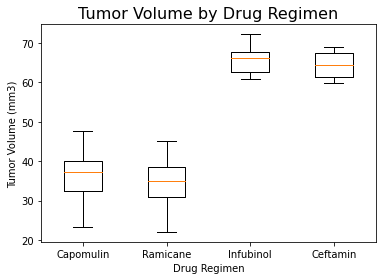

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_list = [capo_obj,ram_obj,infu_obj,ceft_obj]

Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


fig1, ax1 = plt.subplots()
ax1.boxplot(plot_list, labels=Regimen)
ax1.set_title("Tumor Volume by Drug Regimen", fontsize=16)
ax1.set_ylabel("Tumor Volume (mm3)", fontsize=10)
ax1.set_xlabel("Drug Regimen", fontsize=10)

## Line and Scatter Plots

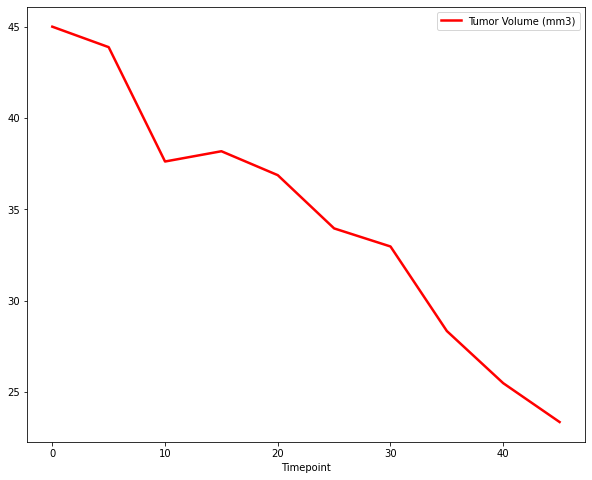

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse

capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red")

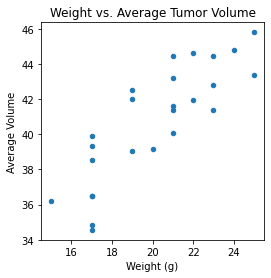

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df.head()

weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=False, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()


## Correlation and Regression

In [26]:
# avg_capo

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capo["Weight (g)"], avg_capo["Average Volume"])

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


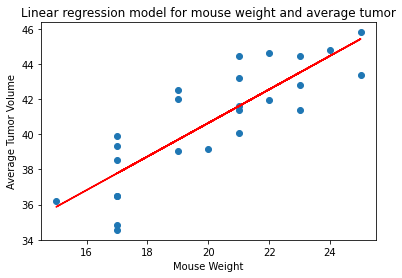

In [28]:

x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]

slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Linear regression model for mouse weight and average tumor")

plt.show()